Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.regularizers import l2

In [2]:
## Mounting Google Drive 
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!unzip /content/gdrive/MyDrive/Assignment/CNN_assignment.zip

Archive:  /content/gdrive/MyDrive/Assignment/CNN_assignment.zip
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010889.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024468.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024470.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024511.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024646.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024654.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024707.jpg  


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [4]:
# Defining the path for train and test images

data_dir_train = pathlib.Path("/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('/content/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [5]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [6]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [7]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [8]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [9]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

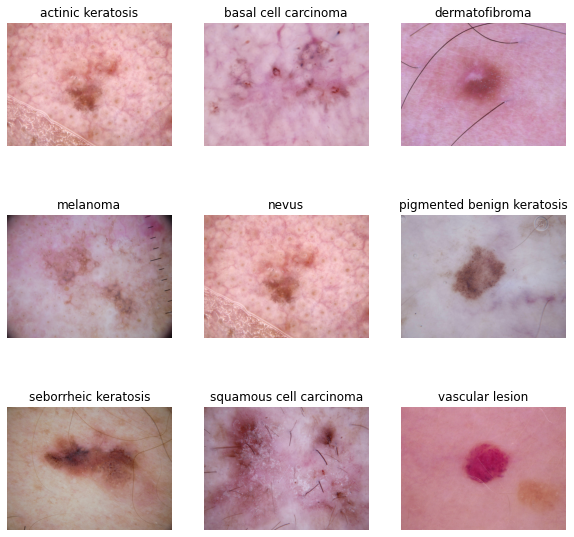

In [10]:
import matplotlib.pyplot as plt
import cv2
plt.figure(figsize=(10,10))
for  i in range(9):
  cl_nme = class_names[i]
  cl_img = cv2.imread(str(list(data_dir_train.glob('*' + cl_nme + '/*.jpg'))[0]))
  ax = plt.subplot(3,3,i+1)
  plt.imshow(cv2.cvtColor(cl_img, cv2.COLOR_BGR2RGB))
  plt.title(cl_nme)
  plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [12]:
### Your code goes here
num_classes = 9

model = Sequential([

layers.experimental.preprocessing.Rescaling(1./255,  input_shape = (img_height, img_width,3)),
Conv2D(16, (3, 3), padding='same'),
Activation('relu'),
Conv2D(16, (3, 3), padding='same'),
Activation('relu'),
MaxPooling2D(pool_size=(2, 2)),

Conv2D(32, (3, 3), padding='same'),
Activation('relu'),
Conv2D(32, (3, 3), padding='same'),
Activation('relu'),
MaxPooling2D(pool_size=(2, 2)),

Conv2D(64, (3, 3), padding='same'),
Activation('relu'),
Conv2D(64, (3, 3), padding='same'),
Activation('relu'),
MaxPooling2D(pool_size=(2, 2)),

Conv2D(128, (3, 3), padding='same'),
Activation('relu'),
Conv2D(128, (3, 3), padding='same'),
Activation('relu'),
MaxPooling2D(pool_size=(2, 2)),

Flatten(),
Dense(512,kernel_regularizer=l2(0.01)),
Activation('relu'),

Dense(num_classes),
Activation('softmax')
])

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [13]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [14]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 activation (Activation)     (None, 180, 180, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 16)      2320      
                                                                 
 activation_1 (Activation)   (None, 180, 180, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                        

### Train the model

In [15]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 26s 111ms/step - loss: 3.2950 - accuracy: 0.1964 - val_loss: 2.0710 - val_accuracy: 0.1790
Epoch 2/20
56/56 [==============================] - 3s 58ms/step - loss: 2.0230 - accuracy: 0.2282 - val_loss: 1.9399 - val_accuracy: 0.3132
Epoch 3/20
56/56 [==============================] - 3s 57ms/step - loss: 1.9236 - accuracy: 0.2969 - val_loss: 1.8105 - val_accuracy: 0.3758
Epoch 4/20
56/56 [==============================] - 3s 57ms/step - loss: 1.9877 - accuracy: 0.2706 - val_loss: 1.8715 - val_accuracy: 0.3154
Epoch 5/20
56/56 [==============================] - 3s 57ms/step - loss: 1.8110 - accuracy: 0.3376 - val_loss: 1.7688 - val_accuracy: 0.3602
Epoch 6/20
56/56 [==============================] - 3s 58ms/step - loss: 1.7916 - accuracy: 0.3538 - val_loss: 1.8206 - val_accuracy: 0.3937
Epoch 7/20
56/56 [==============================] - 3s 58ms/step - loss: 1.6888 - accuracy: 0.3945 - val_loss: 1.7100 - val_accuracy: 0.3803
Epoch 8/20


### Visualizing training results

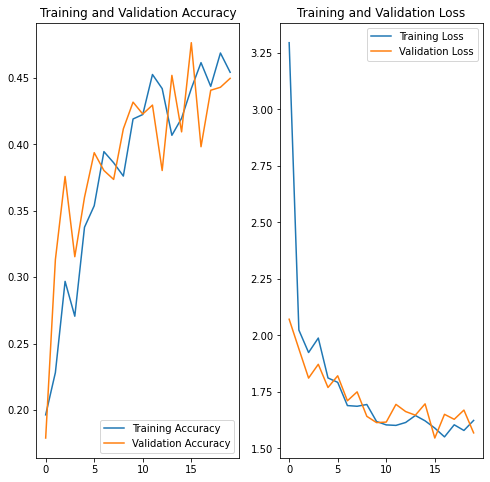

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### The train and validation accuracy are low indicating underfitting.

In [17]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical", seed = 5,input_shape = (img_height, img_width,3)),
  layers.RandomRotation(0.1),
  layers.RandomZoom(0.1),
])

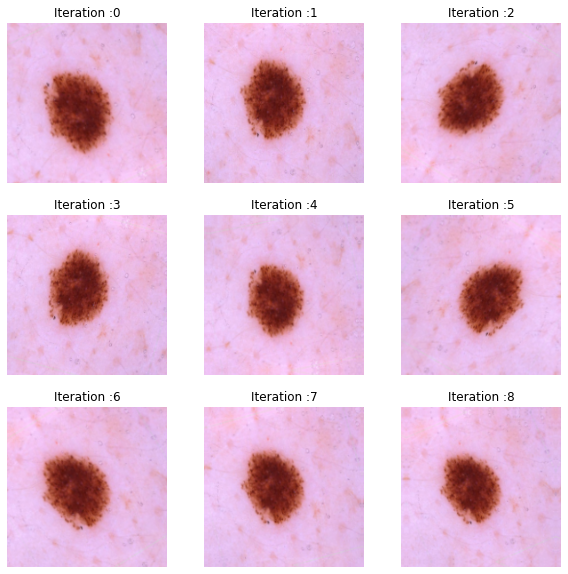

In [18]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  image = images[i]
  image = tf.reshape(images[i], (1,180,180,3))#.reshape((1,32,32,3))

  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    augmented_image = data_augmentation(image, training=True)
    augmented_image = tf.reshape(augmented_image, (180,180,3))
    plt.imshow(augmented_image.numpy().astype("uint8"))
    plt.title("Iteration :" + str(i))
    plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [27]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
num_classes = 9

model1 = Sequential([
data_augmentation,

layers.experimental.preprocessing.Rescaling(1./255),
Conv2D(16, (3, 3), padding='same'),
Activation('relu'),
Conv2D(16, (3, 3), padding='same'),
Activation('relu'),
MaxPooling2D(pool_size=(2, 2)),
#Dropout(0.25),

Conv2D(32, (3, 3), padding='same'),
Activation('relu'),
Conv2D(32, (3, 3), padding='same'),
Activation('relu'),
MaxPooling2D(pool_size=(2, 2)),
#Dropout(0.25),

Conv2D(64, (3, 3), padding='same'),
Activation('relu'),
Conv2D(64, (3, 3), padding='same'),
Activation('relu'),
MaxPooling2D(pool_size=(2, 2)),
Dropout(0.1),

Conv2D(128, (3, 3), padding='same'),
Activation('relu'),
Conv2D(128, (3, 3), padding='same'),
Activation('relu'),
MaxPooling2D(pool_size=(2, 2)),
Dropout(0.1),

Flatten(),
Dense(512,kernel_regularizer=l2(0.01)),
Activation('relu'),
Dropout(0.4),
Dense(num_classes),
Activation('softmax')
])

### Compiling the model

In [28]:
## Your code goes here
### Todo, choose an appropirate optimiser and loss function
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_22 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 activation_28 (Activation)  (None, 180, 180, 16)      0         
                                                                 
 conv2d_23 (Conv2D)          (None, 180, 180, 16)      2320      
                                                                 
 activation_29 (Activation)  (None, 180, 180, 16)      0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 90, 90, 16)      

### Training the model

In [29]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model1.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 6s 83ms/step - loss: 3.4523 - accuracy: 0.1953 - val_loss: 2.0866 - val_accuracy: 0.2058
Epoch 2/20
56/56 [==============================] - 4s 79ms/step - loss: 2.0690 - accuracy: 0.1819 - val_loss: 2.0742 - val_accuracy: 0.1767
Epoch 3/20
56/56 [==============================] - 4s 78ms/step - loss: 2.0560 - accuracy: 0.1936 - val_loss: 2.0507 - val_accuracy: 0.1790
Epoch 4/20
56/56 [==============================] - 4s 80ms/step - loss: 2.0408 - accuracy: 0.1842 - val_loss: 2.0356 - val_accuracy: 0.2058
Epoch 5/20
56/56 [==============================] - 4s 79ms/step - loss: 2.0331 - accuracy: 0.2048 - val_loss: 2.0499 - val_accuracy: 0.2058
Epoch 6/20
56/56 [==============================] - 4s 80ms/step - loss: 2.0419 - accuracy: 0.1920 - val_loss: 2.0444 - val_accuracy: 0.2058
Epoch 7/20
56/56 [==============================] - 4s 80ms/step - loss: 2.0396 - accuracy: 0.2054 - val_loss: 2.0581 - val_accuracy: 0.1924
Epoch 8/20
56

### Visualizing the results

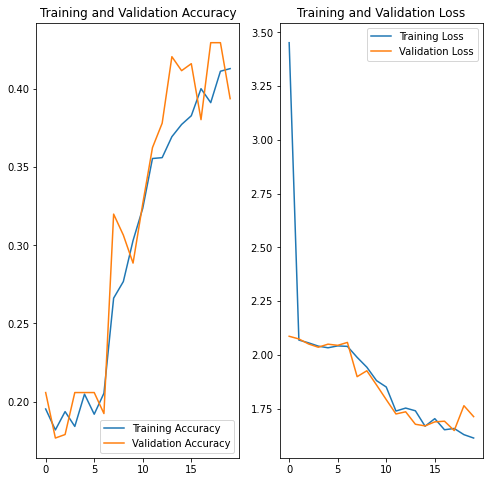

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

### After adding Augumentation layer the performance remains similar

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [31]:
## Your code goes here.
path_list = list(data_dir_train.glob('*/*.jpg'))
class_list = [os.path.basename(os.path.dirname(x)) for x in path_list]
len(path_list)

2239

In [32]:
org_df = pd.DataFrame({"Path":path_list, "Label":class_list})
print(org_df.shape)
org_df.head()

(2239, 2)


,Path,Label
0,/content/Skin cancer ISIC The International Sk...,squamous cell carcinoma
1,/content/Skin cancer ISIC The International Sk...,squamous cell carcinoma
2,/content/Skin cancer ISIC The International Sk...,squamous cell carcinoma
3,/content/Skin cancer ISIC The International Sk...,squamous cell carcinoma
4,/content/Skin cancer ISIC The International Sk...,squamous cell carcinoma


In [33]:
count_df = pd.DataFrame()
count_df["Count"] = org_df.Label.value_counts()
count_df["Percentage"] = (org_df.Label.value_counts()/org_df.shape[0])*100
count_df

,Count,Percentage
pigmented benign keratosis,462,20.634212
melanoma,438,19.562305
basal cell carcinoma,376,16.793211
nevus,357,15.944618
squamous cell carcinoma,181,8.083966
vascular lesion,139,6.208129
actinic keratosis,114,5.091559
dermatofibroma,95,4.242966
seborrheic keratosis,77,3.439035


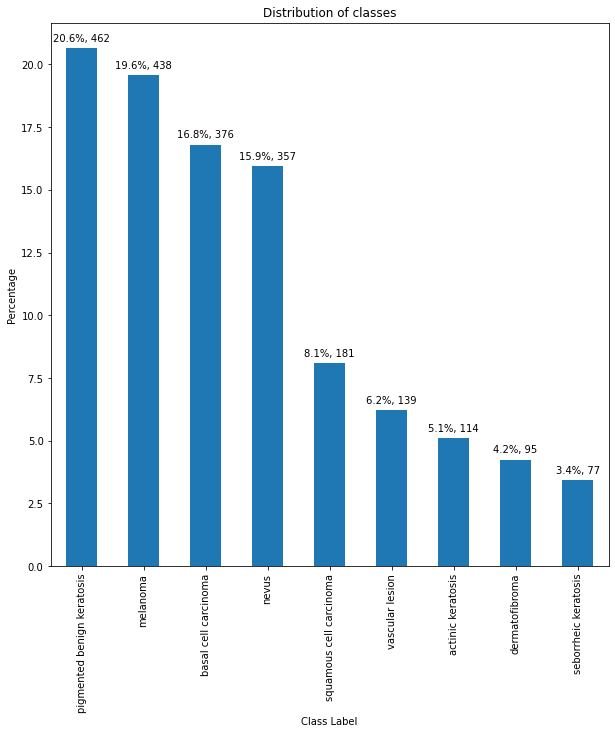

In [34]:
plt.figure(figsize=(10,10))
ax = count_df.Percentage.plot.bar()
ax.set_title('Distribution of classes')
ax.set_xlabel('Class Label')
ax.set_ylabel('Percentage')


for rect in ax.patches:
  y_value = rect.get_height()
  x_value = rect.get_x() + rect.get_width() / 2

  # Number of points between bar and label. Change to your liking.
  space = 5
  # Vertical alignment for positive values
  va = 'bottom'

  # If value of bar is negative: Place label below bar
  if y_value < 0:
      # Invert space to place label below
      space *= -1
      # Vertically align label at top
      va = 'top'

  # Use Y value as label and format number with one decimal place
  label = "{:.1f}%, {}".format(y_value, count_df[count_df.Percentage == y_value]["Count"].item())

  # Create annotation
  ax.annotate(
      label,                      # Use `label` as label
      (x_value, y_value),         # Place label at end of the bar
      xytext=(0, space),          # Vertically shift label by `space`
      textcoords="offset points", # Interpret `xytext` as offset in points
      ha='center',                # Horizontally center label
      va=va)                      # Vertically align label d

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
- Seborrheic keratosis has least number of samples (3.4%).
#### - Which classes dominate the data in terms proportionate number of samples?
- Pigmented benign keratosis and melanoma dominate the data with approximately 20% each. Basal cell carcinoma and Nevus contribute about 15% each.


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [35]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [36]:
path_to_training_dataset="/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F32342483A0>: 100%|██████████| 500/500 [00:20<00:00, 24.85 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F322814AEB0>: 100%|██████████| 500/500 [00:25<00:00, 19.50 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F322B018AC0>: 100%|██████████| 500/500 [00:25<00:00, 19.58 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F322B094640>: 100%|██████████| 500/500 [01:29<00:00,  5.59 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7F3228120B80>: 100%|██████████| 500/500 [01:35<00:00,  5.26 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F322B094D30>: 100%|██████████| 500/500 [00:19<00:00, 25.60 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F322B040610>: 100%|██████████| 500/500 [00:41<00:00, 12.01 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F322B032DF0>: 100%|██████████| 500/500 [00:17<00:00, 28.66 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F3234B5E190>: 100%|██████████| 500/500 [00:16<00:00, 29.48 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [42]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [43]:
from glob import glob
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
len(path_list_new)

4500

In [44]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
len(lesion_list_new)

4500

In [45]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [47]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
org_df = pd.concat([df2,org_df])

In [48]:
org_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [49]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [50]:
#data_dir_train="path to directory with training data + data created using augmentor"
train_ds_aug = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training", 
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [51]:
val_ds_aug = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [57]:
## your code goes here
num_classes = 9

model2 = Sequential([
#data_augmentation,
layers.experimental.preprocessing.Rescaling(1./255,  input_shape = (img_height, img_width,3)),
Conv2D(16, (3, 3), padding='same'),
Activation('relu'),
BatchNormalization(),
Conv2D(16, (3, 3), padding='same'),
Activation('relu'),
BatchNormalization(),
MaxPooling2D(pool_size=(2, 2)),
#Dropout(0.25),

Conv2D(32, (3, 3), padding='same'),
Activation('relu'),
BatchNormalization(),
Conv2D(32, (3, 3), padding='same'),
Activation('relu'),
BatchNormalization(),
MaxPooling2D(pool_size=(2, 2)),
Dropout(0.25),

Conv2D(64, (3, 3), padding='same'),
Activation('relu'),
BatchNormalization(),
Conv2D(64, (3, 3), padding='same'),
Activation('relu'),
BatchNormalization(),
MaxPooling2D(pool_size=(2, 2)),
Dropout(0.25),

Conv2D(128, (3, 3), padding='same'),
Activation('relu'),
BatchNormalization(),
MaxPooling2D(pool_size=(2, 2)),
Dropout(0.25),

Flatten(),
Dense(512,kernel_regularizer=l2(0.01)),
Activation('relu'),
Dropout(0.5),
#Dense(128,kernel_regularizer=l2(0.01)),
#Activation('relu'),
#Dropout(0.5),
Dense(num_classes),
Activation('softmax')
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [58]:
## your code goes here
### Todo, choose an appropirate optimiser and loss function
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_37 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 activation_47 (Activation)  (None, 180, 180, 16)      0         
                                                                 
 batch_normalization_7 (Batc  (None, 180, 180, 16)     64        
 hNormalization)                                                 
                                                                 
 conv2d_38 (Conv2D)          (None, 180, 180, 16)      2320      
                                                                 
 activation_48 (Activation)  (None, 180, 180, 16)      0         
                                                      

#### **Todo:**  Train your model

In [59]:
epochs = 20
## Your code goes here, use 50 epochs.
history = model2.fit(
  train_ds_aug,
  validation_data=val_ds_aug,
  epochs=epochs
)

Epoch 1/20
169/169 [==============================] - 29s 159ms/step - loss: 11.0202 - accuracy: 0.2919 - val_loss: 14.4721 - val_accuracy: 0.1062
Epoch 2/20
169/169 [==============================] - 27s 157ms/step - loss: 4.5316 - accuracy: 0.3715 - val_loss: 8.9682 - val_accuracy: 0.1670
Epoch 3/20
169/169 [==============================] - 27s 156ms/step - loss: 3.0682 - accuracy: 0.4071 - val_loss: 4.2471 - val_accuracy: 0.3868
Epoch 4/20
169/169 [==============================] - 27s 155ms/step - loss: 3.1492 - accuracy: 0.4056 - val_loss: 8.9698 - val_accuracy: 0.1945
Epoch 5/20
169/169 [==============================] - 27s 156ms/step - loss: 2.8680 - accuracy: 0.4377 - val_loss: 2.9571 - val_accuracy: 0.4425
Epoch 6/20
169/169 [==============================] - 29s 166ms/step - loss: 2.6905 - accuracy: 0.4638 - val_loss: 3.1129 - val_accuracy: 0.4343
Epoch 7/20
169/169 [==============================] - 27s 158ms/step - loss: 2.9428 - accuracy: 0.4761 - val_loss: 3.2532 - val_

In [60]:
epochs = 50
## Your code goes here, use 50 epochs.
history = model2.fit(
  train_ds_aug,
  validation_data=val_ds_aug,
  epochs=epochs
)

Epoch 1/50
169/169 [==============================] - 31s 176ms/step - loss: 2.7732 - accuracy: 0.7600 - val_loss: 2.5224 - val_accuracy: 0.7728
Epoch 2/50
169/169 [==============================] - 30s 172ms/step - loss: 2.6239 - accuracy: 0.7613 - val_loss: 2.6932 - val_accuracy: 0.7372
Epoch 3/50
169/169 [==============================] - 29s 166ms/step - loss: 2.6411 - accuracy: 0.7711 - val_loss: 2.6465 - val_accuracy: 0.7416
Epoch 4/50
169/169 [==============================] - 27s 155ms/step - loss: 2.5619 - accuracy: 0.7643 - val_loss: 2.8970 - val_accuracy: 0.6949
Epoch 5/50
169/169 [==============================] - 28s 159ms/step - loss: 2.5387 - accuracy: 0.7839 - val_loss: 2.4296 - val_accuracy: 0.7795
Epoch 6/50
169/169 [==============================] - 28s 160ms/step - loss: 2.4683 - accuracy: 0.7886 - val_loss: 2.4439 - val_accuracy: 0.7906
Epoch 7/50
169/169 [==============================] - 27s 155ms/step - loss: 2.4501 - accuracy: 0.7912 - val_loss: 2.6173 - val_ac

#### **Todo:**  Visualize the model results

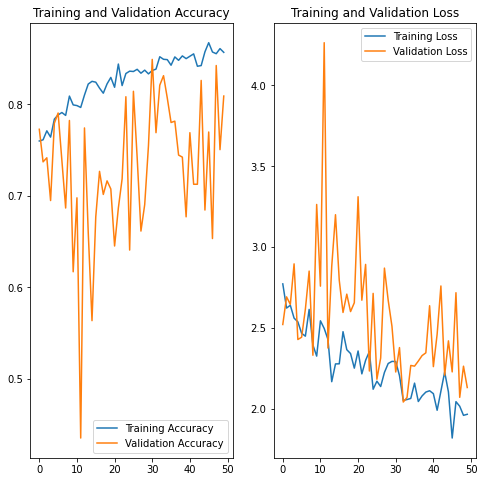

In [61]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

After Class Rebalancing and adjusting dropout layers the issue of under fitting and over fitting is resolved.

Class Rebalancing 
